In [1]:

!python -m pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\dev\anaconda3\lib\site-packages (10.0.1)


In [2]:

!pip install ipykernel --upgrade

Requirement already up-to-date: ipykernel in c:\users\dev\anaconda3\lib\site-packages (4.8.2)
Requirement not upgraded as not directly required: ipython>=4.0.0 in c:\users\dev\anaconda3\lib\site-packages (from ipykernel) (6.2.1)
Requirement not upgraded as not directly required: tornado>=4.0 in c:\users\dev\anaconda3\lib\site-packages (from ipykernel) (4.5.3)
Requirement not upgraded as not directly required: traitlets>=4.1.0 in c:\users\dev\anaconda3\lib\site-packages (from ipykernel) (4.3.2)
Requirement not upgraded as not directly required: jupyter-client in c:\users\dev\anaconda3\lib\site-packages (from ipykernel) (5.2.2)
Requirement not upgraded as not directly required: setuptools>=18.5 in c:\users\dev\anaconda3\lib\site-packages (from ipython>=4.0.0->ipykernel) (38.6.0)
Requirement not upgraded as not directly required: jedi>=0.10 in c:\users\dev\anaconda3\lib\site-packages (from ipython>=4.0.0->ipykernel) (0.11.1)
Requirement not upgraded as not directly required: decorator in 

In [3]:

!pip install networkx --upgrade

Requirement already up-to-date: networkx in c:\users\dev\anaconda3\lib\site-packages (2.1)
Requirement not upgraded as not directly required: decorator>=4.1.0 in c:\users\dev\anaconda3\lib\site-packages (from networkx) (4.2.1)



# Preferential Attachment Model

In [4]:

import networkx as nx
import matplotlib.pyplot as plt
import collections
%matplotlib inline

In [5]:

# Draw the graph using various layouts
def get_layout_dict(G):
    layout_dict = {}
    for layout_type in [function for function in dir(nx) if '_layout' in function]:
        try:
            layout_dict[layout_type] = getattr(nx, layout_type)(G)
        except Exception as e:
            print(layout_type, e)
    
    return layout_dict

In [6]:

def draw_graph(G, pos_dict, degree_dict):
    plt.figure(figsize=(18, 8))
    label_dict = nx.draw_networkx_labels(G, pos=pos_dict, font_size=24)
    line_collection = nx.draw_networkx_edges(G, pos=pos_dict, width=2.5)

    # Color according to degree
    node_list = G.nodes()
    node_color_list = [degree_dict[node] for node in node_list]
    path_collection = nx.draw_networkx_nodes(G, pos=pos_dict, nodelist=node_list, alpha=0.5,
                                             node_size=2400, node_color=node_color_list, cmap='viridis_r')

In [7]:

def draw_degree_histogram(G, degree_sequence):
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    sum_cnt = sum(cnt)
    fraction_list = [x/sum_cnt for x in cnt]
    plt.bar(deg, fraction_list, width=0.80, color='b')

    plt.title('Degree Histogram')
    plt.ylabel('Fraction of Nodes')
    plt.xlabel('Degree')
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    # draw graph in inset
    plt.axes([0.4, 0.4, 0.5, 0.5])
    if nx.is_directed(G):
        Gcc = G
    else:
        Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
    pos = nx.spring_layout(G)
    plt.axis('off')
    nx.draw_networkx_nodes(Gcc, pos, node_size=20)
    line_collection = nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

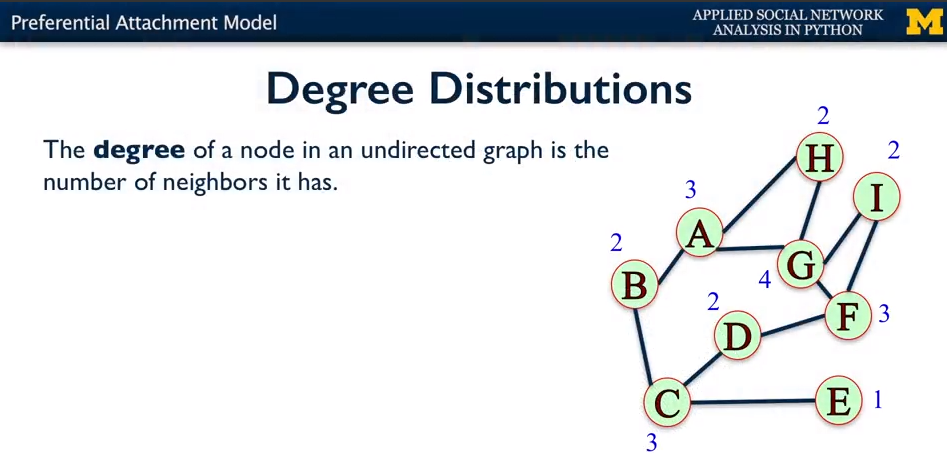

In [8]:

from IPython.display import Image

Image('../../saves/png/degree_distributions.png')

In [9]:

degree_distribution_graph = nx.Graph()
degree_distribution_graph.add_nodes_from([chr(i) for i in range(65, 74)])
degree_distribution_graph.add_edges_from([('A', 'B'), ('A', 'G'), ('A', 'H'), ('B', 'C'), ('C', 'D'),
                                          ('C', 'E'), ('D', 'F'), ('F', 'G'), ('F', 'I'), ('G', 'H'),
                                          ('G', 'I')])

In [10]:

LAYOUT_DICT = get_layout_dict(degree_distribution_graph)
print(LAYOUT_DICT.keys())

rescale_layout 'Graph' object has no attribute 'shape'
dict_keys(['circular_layout', 'fruchterman_reingold_layout', 'kamada_kawai_layout', 'random_layout', 'shell_layout', 'spectral_layout', 'spring_layout'])


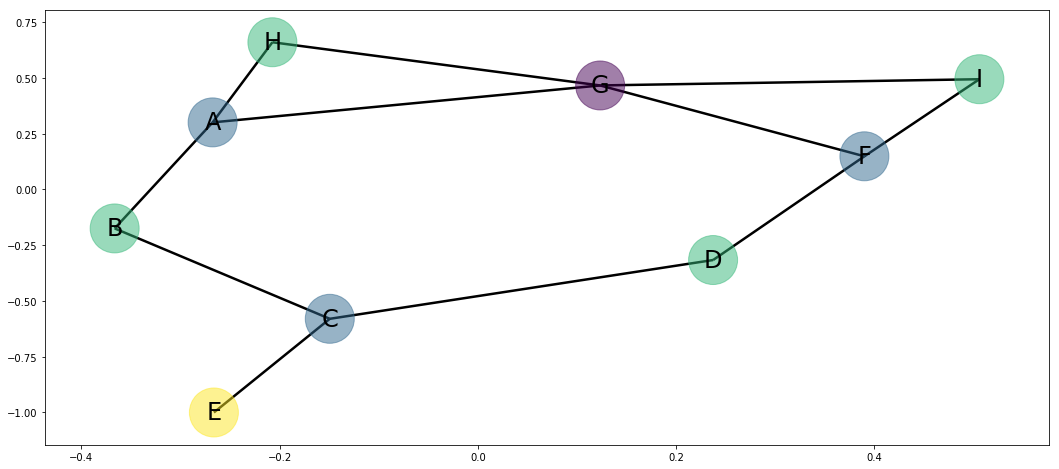

In [11]:

# Draw the graph using various layouts
pos_dict = LAYOUT_DICT['fruchterman_reingold_layout']
degree_dict = degree_distribution_graph.degree()
draw_graph(degree_distribution_graph, pos_dict, degree_dict)

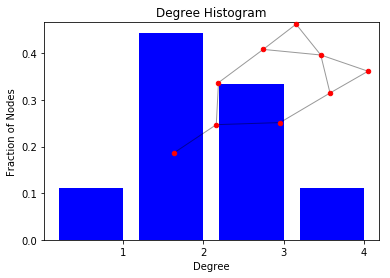

In [12]:

degree_sequence = sorted([d for n, d in degree_distribution_graph.degree()], reverse=True)
draw_degree_histogram(degree_distribution_graph, degree_sequence)

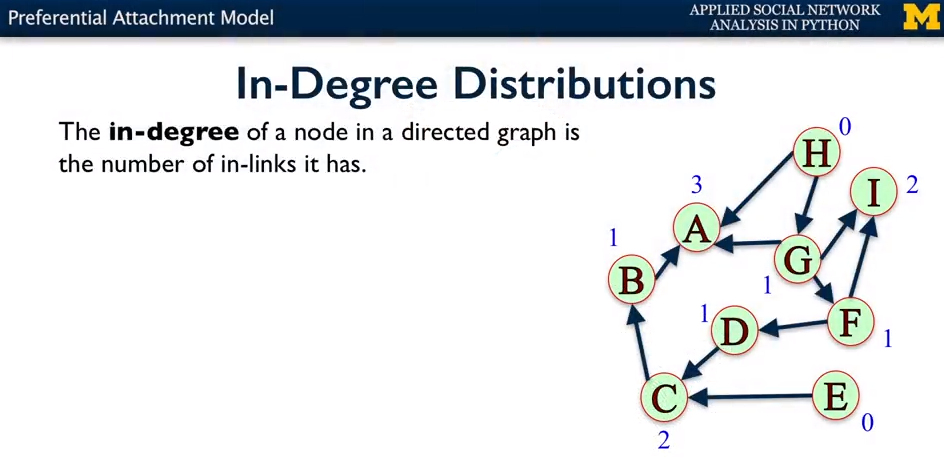

In [13]:

from IPython.display import Image

Image('../../saves/png/in_degree_distributions.png')

In [14]:

in_degree_distribution_graph = nx.DiGraph()
in_degree_distribution_graph.add_nodes_from([chr(i) for i in range(65, 74)])
in_degree_distribution_graph.add_edges_from([('B', 'A'), ('C', 'B'), ('D', 'C'), ('E', 'C'), ('F', 'D'),
                                          ('F', 'I'), ('G', 'A'), ('G', 'F'), ('G', 'I'), ('H', 'A'),
                                          ('H', 'G')])

In [15]:

LAYOUT_DICT = get_layout_dict(in_degree_distribution_graph)
print(LAYOUT_DICT.keys())

rescale_layout 'DiGraph' object has no attribute 'shape'
dict_keys(['circular_layout', 'fruchterman_reingold_layout', 'kamada_kawai_layout', 'random_layout', 'shell_layout', 'spectral_layout', 'spring_layout'])


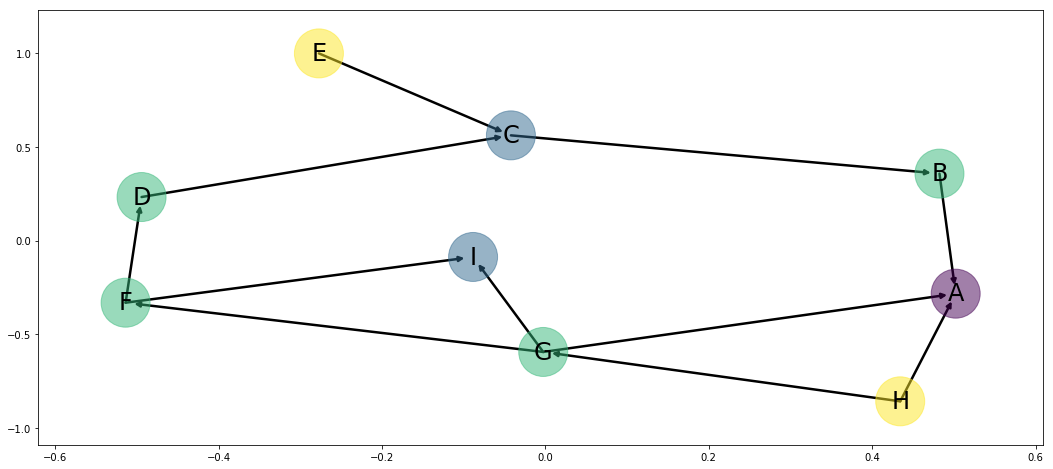

In [16]:

# Draw the graph using various layouts
pos_dict = LAYOUT_DICT['kamada_kawai_layout']

# Color according to in degree
in_degree_dict = in_degree_distribution_graph.in_degree()

draw_graph(in_degree_distribution_graph, pos_dict, in_degree_dict)

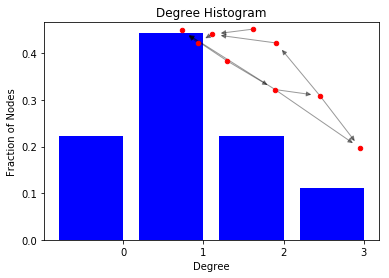

In [17]:

degree_sequence = sorted([d for n, d in in_degree_distribution_graph.in_degree()], reverse=True)
draw_degree_histogram(in_degree_distribution_graph, degree_sequence)

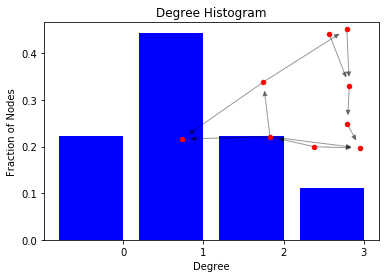

In [18]:

degree_sequence = sorted([d for n, d in in_degree_distribution_graph.out_degree()], reverse=True)
draw_degree_histogram(in_degree_distribution_graph, degree_sequence)


## What is the probability that node 8 attaches to node 3?

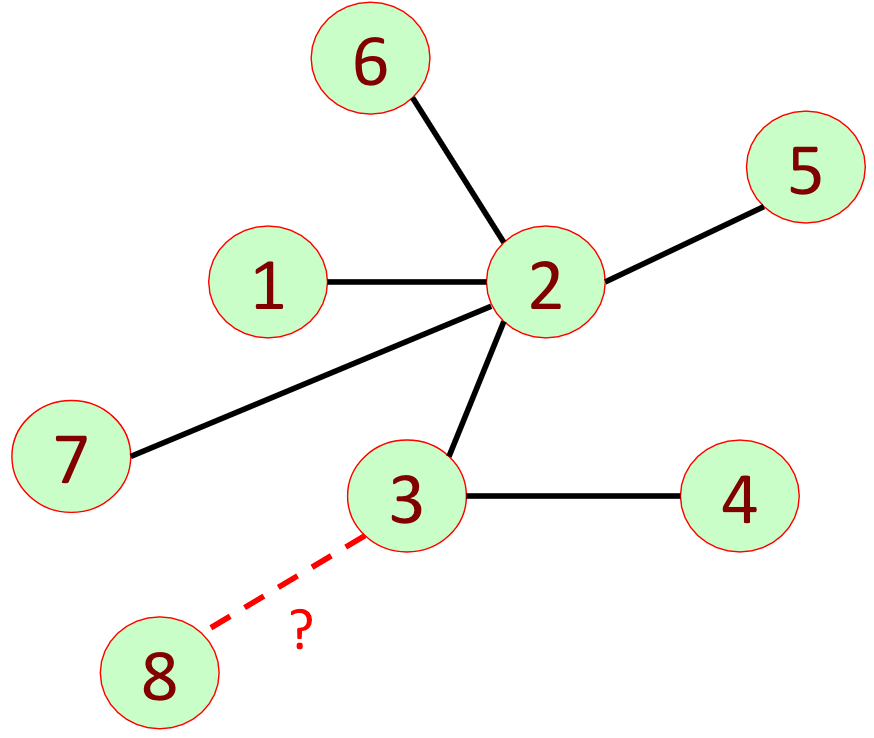

In [19]:

from IPython.display import Image

Image('../../saves/png/prob_8_3.png')

In [20]:

prob_8_3_graph = nx.Graph()
prob_8_3_graph.add_nodes_from(range(1, 9))
prob_8_3_graph.add_edges_from([(1, 2), (2, 3), (2, 5), (2, 6), (2, 7), (3, 4)])

In [21]:

LAYOUT_DICT = get_layout_dict(prob_8_3_graph)
print(LAYOUT_DICT.keys())

rescale_layout 'Graph' object has no attribute 'shape'
dict_keys(['circular_layout', 'fruchterman_reingold_layout', 'kamada_kawai_layout', 'random_layout', 'shell_layout', 'spectral_layout', 'spring_layout'])


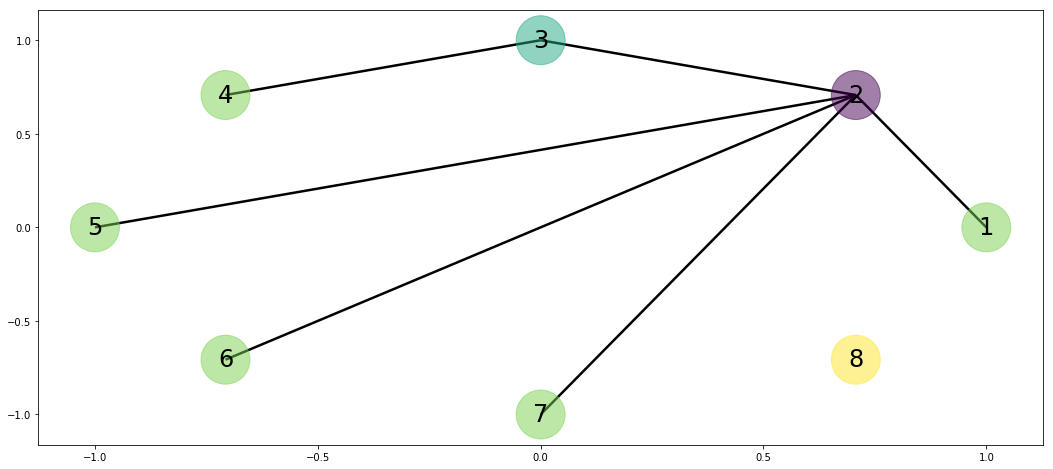

In [22]:

# Draw the graph using various layouts
pos_dict = LAYOUT_DICT['circular_layout']

# Color according to degree
degree_dict = prob_8_3_graph.degree()

draw_graph(prob_8_3_graph, pos_dict, degree_dict)

In [23]:

total_degrees = sum([value for key, value in degree_dict])
{key: round(value/total_degrees, 3) for key, value in degree_dict}

{1: 0.083, 2: 0.417, 3: 0.167, 4: 0.083, 5: 0.083, 6: 0.083, 7: 0.083, 8: 0.0}

In [24]:

node_count = 1e6
G = nx.barabasi_albert_graph(node_count, 1)

In [25]:

degree_view = G.degree()
values_list = [value for key, value in degree_view]
sorted_unique_list = sorted(set(values_list))
histogram_list = [values_list.count(i)/node_count for i in sorted_unique_list]

(0.6816647358952032, 3126.1702238438966, 5.114695325676805e-07, 1.3025213772862343)


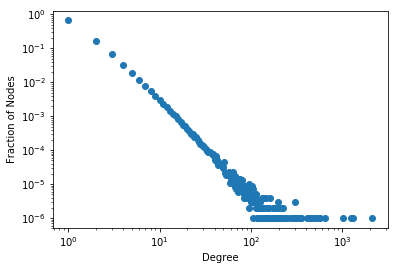

In [26]:

line2d = plt.plot(sorted_unique_list, histogram_list, 'o')
xlabel_text = plt.xlabel('Degree')
ylabel_text = plt.ylabel('Fraction of Nodes')
plt.xscale('log')
plt.yscale('log')
plt.autoscale()
print(plt.axis())

In [33]:

# https://stackoverflow.com/questions/15713279/calling-pylab-savefig-without-display-in-ipython
png_dir = '../../saves/png/movie_frames/'
for exponent in range(1, 7):
    node_count = 1.0 * 10**exponent
    G = nx.barabasi_albert_graph(node_count, 1)
    degree_view = G.degree()
    values_list = [value for key, value in degree_view]
    sorted_unique_list = sorted(set(values_list))
    histogram_list = [values_list.count(i)/node_count for i in sorted_unique_list]
    new_df = pd.DataFrame({'degree': sorted_unique_list, 'node_fraction': histogram_list})
    
    # Turn interactive plotting off
    plt.ioff()

    # Build the plot
    fig = plt.figure()
    line2d = plt.plot(sorted_unique_list, histogram_list, 'o')
    xlabel_text = plt.xlabel('Degree')
    ylabel_text = plt.ylabel('Fraction of Nodes')
    plt.xscale('log')
    plt.yscale('log')
    plt.autoscale()
    
    # Save as PNG
    plt.savefig(png_dir+'plot_%s.png' % exponent)
    
    # Then close it so it never gets displayed
    plt.close(fig)
        
images = []
for subdir, dirs, files in os.walk(png_dir):
    for file in files:
        filepath = os.path.join(subdir, file)
        if filepath.endswith('.png'):
            images.append(imageio.imread(filepath))
imageio.mimsave('../../saves/gif/movie.gif', images)

t1 = time.time()
print(t1-t0, time.ctime(t1))

657.9581036567688 Sun May 20 07:43:29 2018


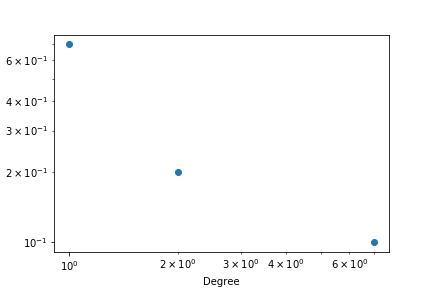

In [34]:

from IPython.display import Image

Image('../../saves/gif/movie.gif')